In [3]:
import cv2
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, Flatten
# from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"\sign_mnist_train.csv")
df.shape

(27455, 785)

In [7]:
df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [24]:
x = df.iloc[:,1:]
x.shape

(27455, 784)

In [25]:
x.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
5,161,168,172,173,178,184,189,193,196,202,...,76,74,68,62,53,55,48,238,255,255
6,134,134,135,135,136,137,137,138,138,138,...,109,102,91,65,138,189,179,181,181,179
7,114,42,74,99,104,109,117,127,142,152,...,214,218,220,223,223,225,227,227,228,228
8,169,174,176,180,183,185,187,188,190,191,...,119,118,123,120,118,114,94,74,61,57
9,189,189,189,190,190,191,190,190,190,189,...,13,53,200,204,201,201,193,175,178,156


In [14]:
y = df.iloc[:,:1]
y.shape

(27455, 1)

In [15]:
y.head(10)

,label
0,3
1,6
2,2
3,2
4,13
5,16
6,8
7,22
8,3
9,3


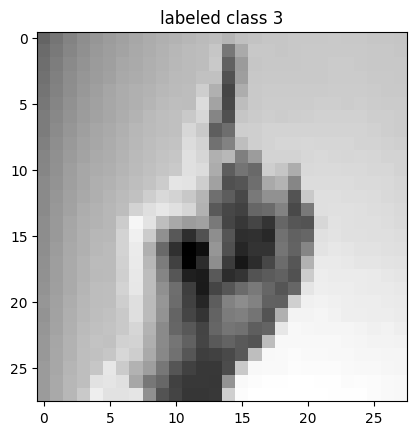

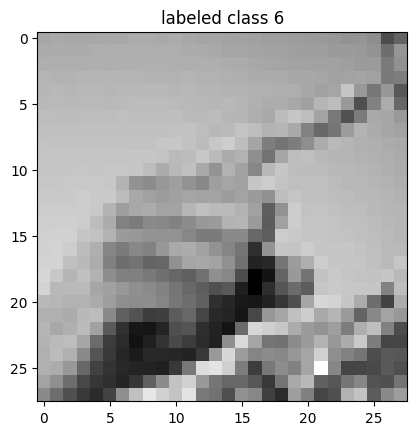

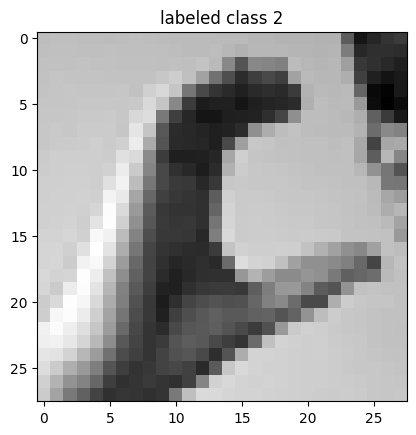

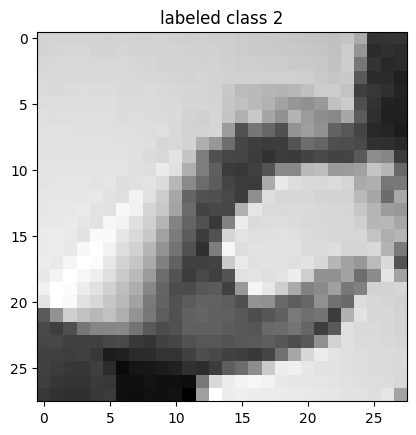

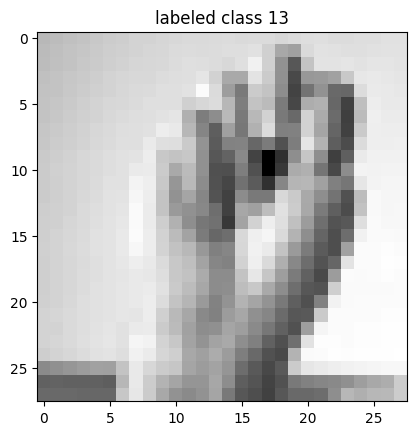

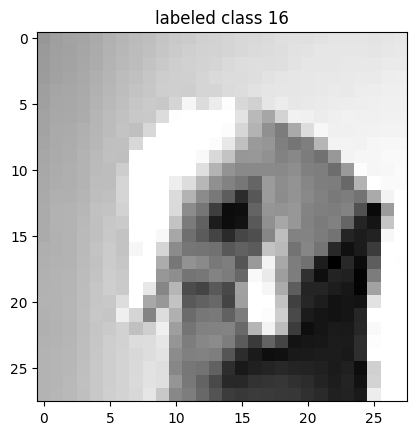

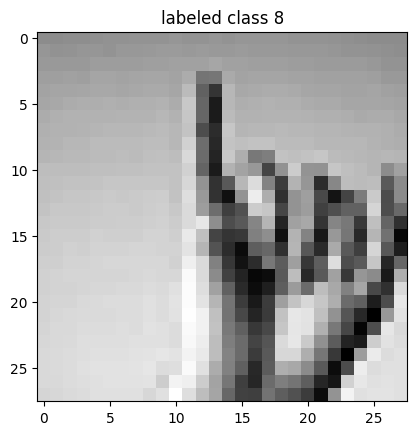

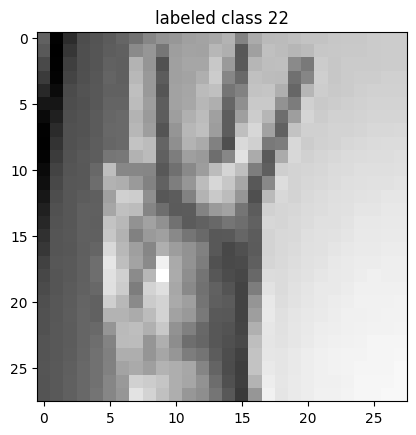

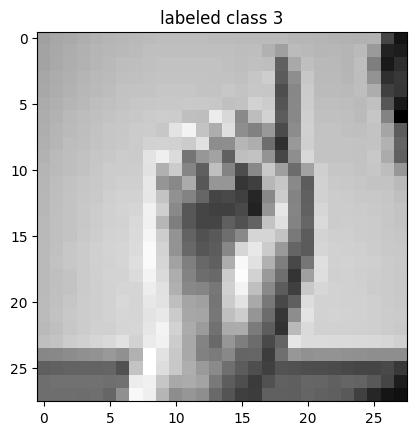

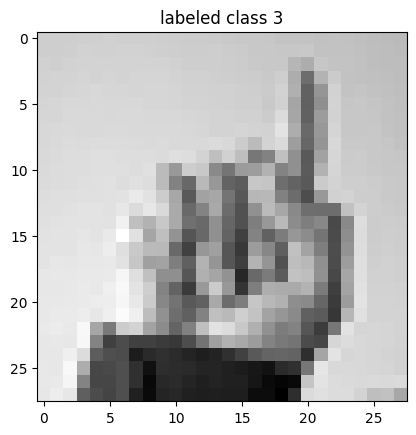

In [16]:
for i in range (0,10):
  sample = np.reshape(df[df.columns[1:]].iloc[i].values/255, (28,28))
  plt.figure()
  plt.title("labeled class {}".format(df["label"].iloc[i]))
  plt.imshow(sample, 'gray')

In [26]:
x_s = x/255.0
x_s.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961
5,0.631373,0.658824,0.674510,0.678431,0.698039,0.721569,0.741176,0.756863,0.768627,0.792157,...,0.298039,0.290196,0.266667,0.243137,0.207843,0.215686,0.188235,0.933333,1.000000,1.000000
6,0.525490,0.525490,0.529412,0.529412,0.533333,0.537255,0.537255,0.541176,0.541176,0.541176,...,0.427451,0.400000,0.356863,0.254902,0.541176,0.741176,0.701961,0.709804,0.709804,0.701961
7,0.447059,0.164706,0.290196,0.388235,0.407843,0.427451,0.458824,0.498039,0.556863,0.596078,...,0.839216,0.854902,0.862745,0.874510,0.874510,0.882353,0.890196,0.890196,0.894118,0.894118
8,0.662745,0.682353,0.690196,0.705882,0.717647,0.725490,0.733333,0.737255,0.745098,0.749020,...,0.466667,0.462745,0.482353,0.470588,0.462745,0.447059,0.368627,0.290196,0.239216,0.223529
9,0.741176,0.741176,0.741176,0.745098,0.745098,0.749020,0.745098,0.745098,0.745098,0.741176,...,0.050980,0.207843,0.784314,0.800000,0.788235,0.788235,0.756863,0.686275,0.698039,0.611765


In [27]:
x_D = np.reshape(x_s,(27455,28,28,1))

In [28]:
x_D.shape

(27455, 28, 28, 1)

In [29]:
from keras.utils import to_categorical
y_c = to_categorical(y)

In [35]:
y_D = np.reshape(y,(27455,))

In [36]:
y_D.shape

(27455,)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_D, y_D, test_size=0.30, shuffle=False)

In [54]:
X_train.shape

(19218, 28, 28, 1)

In [55]:
y_train.shape

(19218,)

In [53]:
print(y_train)

[ 3  6  2 ... 14 17 14]


In [57]:
from keras import layers
from keras import models

convolutional_nn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
                                      
    # layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    # layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(26, activation='softmax')
])

In [58]:
convolutional_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutional_nn.fit(X_train, y_train, epochs=10)

Epoch 1/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2495 - loss: 2.4806
Epoch 2/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7539 - loss: 0.7441
Epoch 3/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8556 - loss: 0.4246
Epoch 4/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9089 - loss: 0.2726
Epoch 5/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9290 - loss: 0.2063
Epoch 6/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9492 - loss: 0.1531
Epoch 7/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9577 - loss: 0.1282
Epoch 8/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9613 - loss: 0.1124
Epoch 9/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9687 - loss: 0.0968
Epoch 10/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9725 - loss: 0.0776


In [59]:
convolutional_nn.evaluate(X_test, y_test)

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9992 - loss: 0.0064


[0.005681128241121769, 0.9996358156204224]

In [60]:
convolutional_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 368,912 (1.41 MB)

 Trainable params: 122,970 (480.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,942 (960.71 KB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [68]:
test_image = X_test[10]
test_label = y_test[10]

In [72]:
test_image_p = test_image.reshape((1,28,28,1))

In [74]:
predictions = convolutional_nn.predict(test_image_p)
predicted_class = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


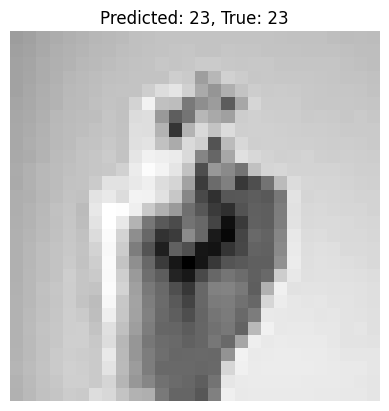

In [75]:
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_class[0]}, True: {test_label}')
plt.axis('off')
plt.show()

In [76]:
num_to_letter = {i: chr(65 + i) for i in range(26)}

In [66]:
from tensorflow.keras.utils import plot_model
plot_model(convolutional_nn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.
